In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import DataFrame
from pandas import Series
from scipy import stats
from scipy.stats import kstest
from scipy.stats import bartlett
from scipy.stats import levene

data = pd.read_csv("Life Expectancy Data.csv")
data.head()

,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
#null 확인 및 제거
np.sum(pd.isnull(data))
country = data["Country"]
lifeExpect = data["Life_expect"]
countrylifeExpect = pd.concat([country,lifeExpect],axis=1)
countrylifeExpect = countrylifeExpect.dropna()
print(np.sum(pd.isnull(countrylifeExpect)))
print(countrylifeExpect)

Country        0
Life_expect    0
dtype: int64
          Country  Life_expect
0     Afghanistan         65.0
1     Afghanistan         59.9
2     Afghanistan         59.9
3     Afghanistan         59.5
4     Afghanistan         59.2
...           ...          ...
2933     Zimbabwe         44.3
2934     Zimbabwe         44.5
2935     Zimbabwe         44.8
2936     Zimbabwe         45.3
2937     Zimbabwe         46.0

[2928 rows x 2 columns]


In [11]:
#country 별 'life_expect 갯수'
grouped_cToe = countrylifeExpect["Life_expect"].groupby(countrylifeExpect["Country"])
print("size: \n",grouped_cToe.size())

#country 별 '평균 life_expect'
grouped_cToe_mean = grouped_cToe.mean()
print("mean: \n",grouped_cToe_mean)

size: 
 Country
Afghanistan                           16
Albania                               16
Algeria                               16
Angola                                16
Antigua and Barbuda                   16
                                      ..
Venezuela (Bolivarian Republic of)    16
Viet Nam                              16
Yemen                                 16
Zambia                                16
Zimbabwe                              16
Name: Life_expect, Length: 183, dtype: int64
mean: 
 Country
Afghanistan                           58.19375
Albania                               75.15625
Algeria                               73.61875
Angola                                49.01875
Antigua and Barbuda                   75.05625
                                        ...   
Venezuela (Bolivarian Republic of)    73.38750
Viet Nam                              74.77500
Yemen                                 63.86250
Zambia                                53.90625
Zi

In [4]:
from scipy import stats
#print(stats.ttest_ind(grouped_cToe_mean[1]))

<AxesSubplot:xlabel='Country', ylabel='Life_expect'>

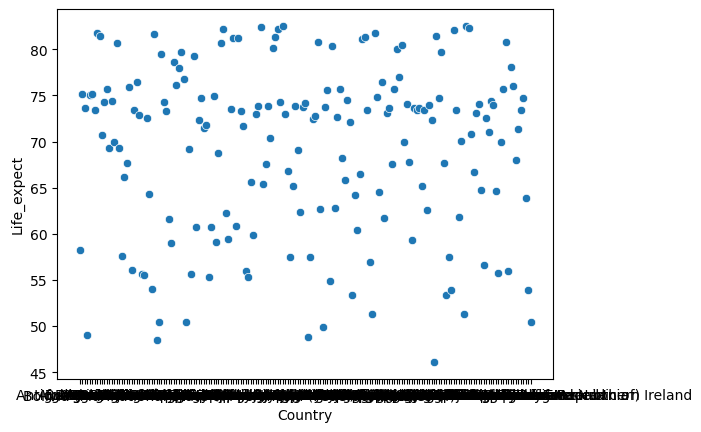

In [5]:
#country 별 '평균 life_expect' 산점도 => 시각화X => 데이터 전처리; 음 (status같은)다른 데이터를 뽑고 싶은데...
sns.scatterplot(data=grouped_cToe_mean)